In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
data= pd.read_csv("housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'], axis=1)
Y=data['median_house_value']
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)

In [ ]:
train_data=x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
375,-122.15,37.74,49,1325,277.0,764,282,3.3125,NEAR BAY,118000
14204,-117.06,32.69,9,1520,269.0,1250,265,4.8875,NEAR OCEAN,157700
20312,-119.17,34.19,28,1444,508.0,2145,437,1.6964,NEAR OCEAN,175000
1277,-121.60,37.90,5,14684,2252.0,4276,1722,6.9051,INLAND,340900
19300,-122.83,38.39,19,1765,394.0,868,388,2.4620,<1H OCEAN,260300
...,...,...,...,...,...,...,...,...,...,...
13029,-121.19,38.67,16,1754,284.0,773,277,4.8170,INLAND,147000
16117,-122.54,37.74,42,2006,415.0,1230,435,4.1786,NEAR OCEAN,271100
19085,-122.58,38.38,27,3800,728.0,1587,605,4.7237,<1H OCEAN,306600
17693,-121.81,37.28,17,2277,428.0,1887,422,5.7078,<1H OCEAN,217000


**Visualizing the data**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

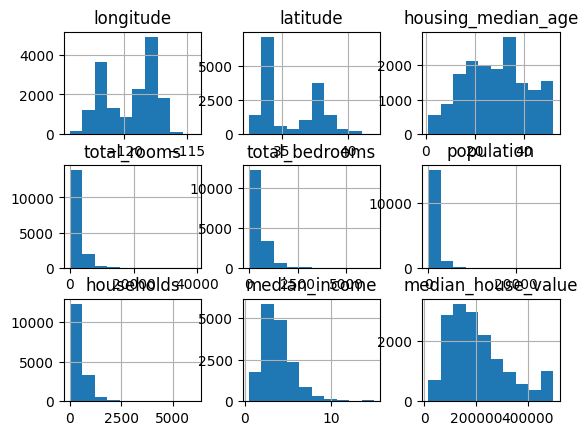

In [ ]:
train_data.hist()

<ipython-input-122-85466d51f5b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

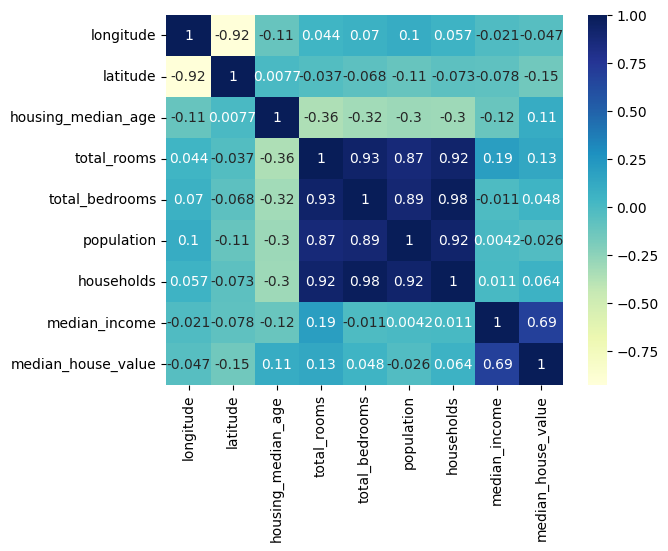

In [ ]:
sn.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

**Preprocessing**

In [ ]:
train_data["total_rooms"]=np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+1)
train_data["population"]=np.log(train_data["population"]+1)
train_data["households"]=np.log(train_data["households"]+1)

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7224
INLAND        5190
NEAR OCEAN    2099
NEAR BAY      1828
ISLAND           5
Name: ocean_proximity, dtype: int64

<ipython-input-125-85466d51f5b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

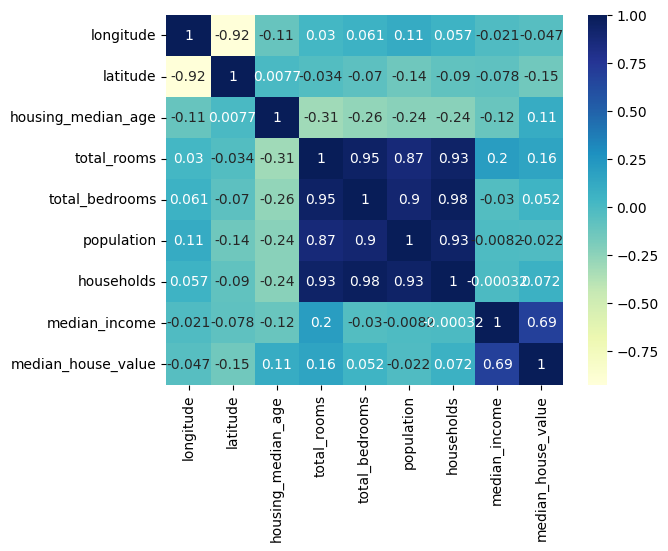

In [ ]:
sn.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

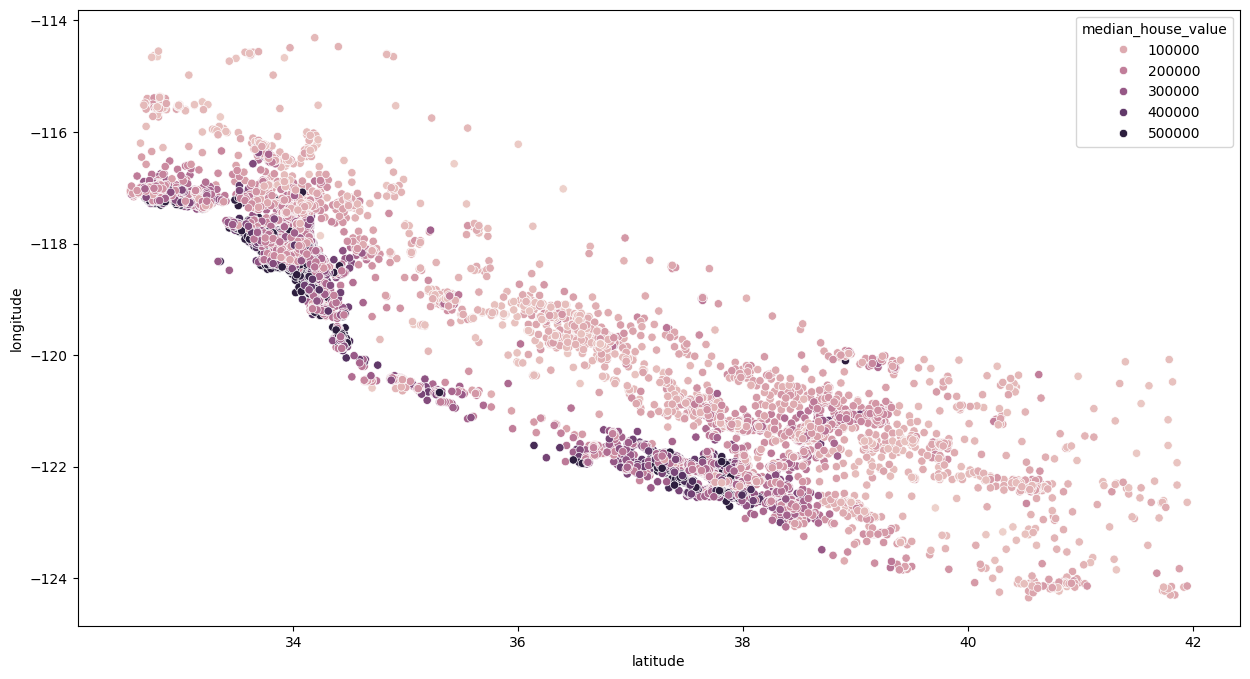

In [ ]:
plt.figure(figsize=(15,8))
sn.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value")

In [ ]:
train_data['beadrooms_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['households_rooms']=train_data["total_rooms"]/train_data['households']

In [ ]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,beadrooms_ratio,households_rooms
375,-122.15,37.74,49,7.189922,5.627621,6.639876,5.645447,3.3125,NEAR BAY,118000,0.782710,1.273579
14204,-117.06,32.69,9,7.327123,5.598422,7.131699,5.583496,4.8875,NEAR OCEAN,157700,0.764068,1.312282
20312,-119.17,34.19,28,7.275865,6.232448,7.671361,6.082219,1.6964,NEAR OCEAN,175000,0.856592,1.196252
1277,-121.60,37.90,5,9.594582,7.720018,8.361007,7.451822,6.9051,INLAND,340900,0.804623,1.287548
19300,-122.83,38.39,19,7.476472,5.978886,6.767343,5.963579,2.4620,<1H OCEAN,260300,0.799693,1.253689


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 375 to 73
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  int64  
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  object 
 9   median_house_value  16346 non-null  int64  
 10  beadrooms_ratio     16346 non-null  float64
 11  households_rooms    16346 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 2.1+ MB


In [ ]:
train_data['ocean_proximity'] = train_data['ocean_proximity'].astype('category').cat.codes

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,beadrooms_ratio,households_rooms
375,-122.15,37.74,49,7.189922,5.627621,6.639876,5.645447,3.3125,3,118000,0.782710,1.273579
14204,-117.06,32.69,9,7.327123,5.598422,7.131699,5.583496,4.8875,4,157700,0.764068,1.312282
20312,-119.17,34.19,28,7.275865,6.232448,7.671361,6.082219,1.6964,4,175000,0.856592,1.196252
1277,-121.60,37.90,5,9.594582,7.720018,8.361007,7.451822,6.9051,1,340900,0.804623,1.287548
19300,-122.83,38.39,19,7.476472,5.978886,6.767343,5.963579,2.4620,0,260300,0.799693,1.253689
...,...,...,...,...,...,...,...,...,...,...,...,...
13029,-121.19,38.67,16,7.470224,5.652489,6.651572,5.627621,4.8170,1,147000,0.756669,1.327421
16117,-122.54,37.74,42,7.604396,6.030685,7.115582,6.077642,4.1786,4,271100,0.793052,1.251208
19085,-122.58,38.38,27,8.243019,6.591674,7.370231,6.406880,4.7237,0,306600,0.799667,1.286589
17693,-121.81,37.28,17,7.731053,6.061457,7.543273,6.047372,5.7078,0,217000,0.784040,1.278415


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': 'beadrooms_ratio'}>,
        <Axes: title={'center': 'households_rooms'}>]], dtype=object)

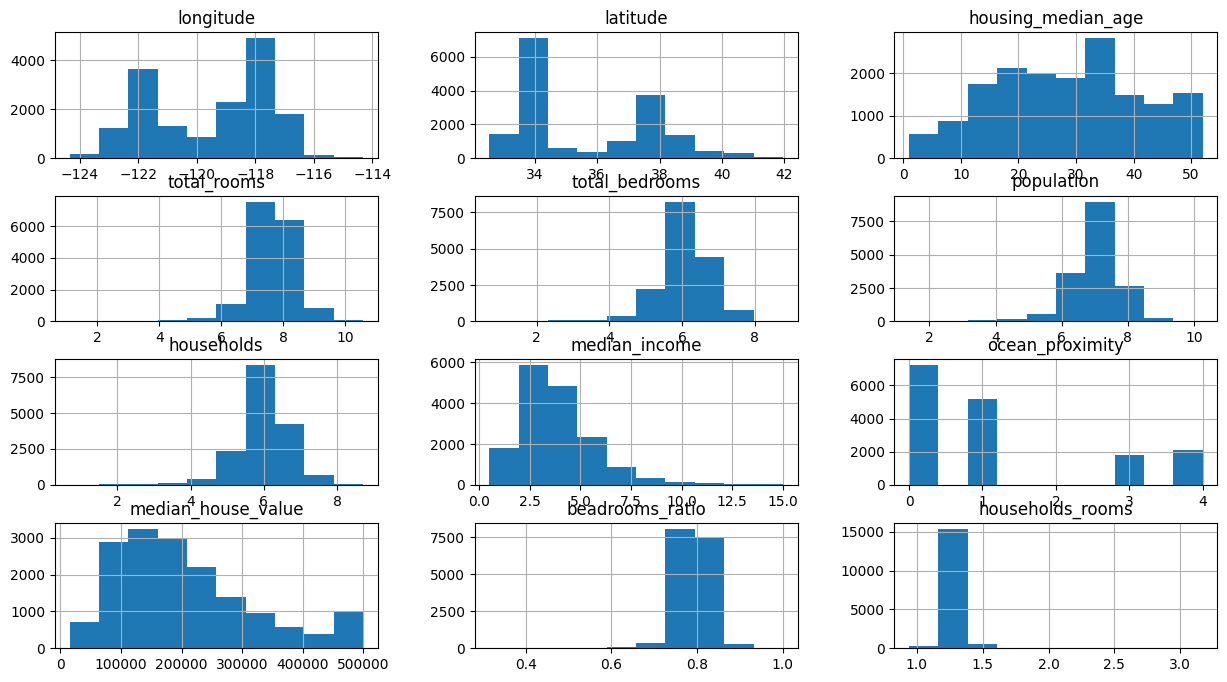

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
from sklearn.linear_model import LinearRegression
x_train, y_train=train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
test_data=x_test.join(y_test)

test_data["total_rooms"]=np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+1)
test_data["population"]=np.log(test_data["population"]+1)
test_data["households"]=np.log(test_data["households"]+1)

test_data['ocean_proximity'] = test_data['ocean_proximity'].astype('category').cat.codes

test_data['beadrooms_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['households_rooms']=test_data["total_rooms"]/test_data['households']



In [ ]:
x_test, y_test=test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
reg.score(x_test, y_test)

0.6682690348416711

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(x_test, y_test)

0.8054489314335209

In [ ]:
from sklearn.model_selection import GridSearchCV

